# Homework

Before you begin, remember to import the necessary libraries.

In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme()

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

### Standard Exercise

The [data](https://www.statsmodels.org/devel/datasets/generated/engel.html) contained in the `df` DataFrame represents **income** and **food expenditure** for 235 working class households in 1857 Belgium. It was loaded from `statsmodels`' library using  its [Dataset Package](https://www.statsmodels.org/devel/datasets/index.html). 



In [2]:
# run this cell (do not delete it)
df = sm.datasets.engel.load_pandas().data
df.head()

,income,foodexp
0,420.157651,255.839425
1,541.411707,310.958667
2,901.157457,485.680014
3,639.080229,402.997356
4,750.875606,495.560775


1. Use an appropriate chart to visualise the **relationship** between the `income` and `foodexp` variables and give a first rough description of their relationship in terms of sign and intensity. 

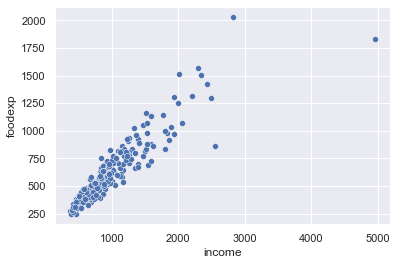

In [3]:
sns.scatterplot(x='income', y='foodexp', data=df)
plt.show()

The correlation between the two variables looks positive.

2. Use an appropriate metric to measure the sign and strength of the relationship between the two metrics from the previous point. 

In [7]:
correl = df.income.corr(df.foodexp)
print('Correlation coefficient between X and Y:', round(correl, 2))

Correlation coefficient between X and Y: 0.91


3. You should have noticed some anomalous values in the chart from the first question. Would you define them as extreme values or as outliers? Why? Would you keep them in your dataset or remove them?

They are clearly extreme values because, although they distance themselves quite a lot from the bulk of the data, they definitely lay in a range of possible income and food expenditure values (whereas outliers take values that are not physically or conceptually possible, given the context under scrutiny). Extreme values should be kept in the dataset, because they are part of the data and contain important information about the dispersion of the feature we're studying.

4. Using the `statsmodels` package, define a linear regression model that fits the data. Specifically, use `foodexp` as the dependent variable and `income` as the predictor *(note: remember to add a constant to the model)*. Then print a summary table showing the main statistics and the estimated coefficients. 

In [11]:
Y = df['foodexp']
X = df['income']
X = sm.add_constant(X)   # add a constant to the model
model = sm.OLS(Y,X)
results = model.fit()

5. Given the summary table from the previous question, comment on the regression line's coefficients (intercept and slope) as well as on the $R^2$ statistic. Is the model fitting well the data or not?

In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                foodexp   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     1141.
Date:                Wed, 17 Aug 2022   Prob (F-statistic):           9.92e-92
Time:                        14:07:45   Log-Likelihood:                -1445.7
No. Observations:                 235   AIC:                             2895.
Df Residuals:                     233   BIC:                             2902.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        147.4754     15.957      9.242      0.000     116.037     178.914
income         0.4852      0.014     33.772      0.000       0.457       0.513
==============================================================================
Omnibus:                       68.110   Durbin-Watson:                   1.411
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              927.676
Skew:                          -0.670   Prob(JB):                    3.61e-202
Kurtosis:                      12.641   Cond. No.                     2.38e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.38e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Both the intercept and the slope coefficient for the income predictor are statistically significant. In other words, the null hypothesis that the coefficient is zero (and that therefore there is no relationship between the two variables) has been rejected at a significance level  𝛼=0.05 . The model is fitting the data very well, as it can be confirmed by the coefficient of determination  𝑅2=0.83 .

6. Plot the data using a scatterplot and, on top of it, draw the regression line *(hint: use the estimated intercept ans slope coefficients)*. 

In [13]:
results_as_html = results.summary().tables[1].as_html()
results_df = pd.read_html(results_as_html, header=0, index_col=0)[0]

intercept, slope = results_df['coef'][0], results_df['coef'][1]

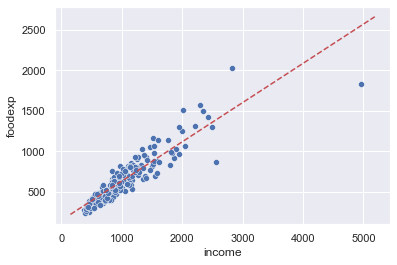

In [14]:
# plot the data points using a scatter plot
sns.scatterplot(x='income', y='foodexp', data=df)

axes = plt.gca()   # get axes instance of current figure
x_vals = np.array(axes.get_xlim())   # get x-axis limits
y_vals = intercept + (slope * x_vals)   # define the equation of the regression line
plt.plot(x_vals, y_vals, '--', color='r')   # draw the regression line on top of the scatter plot
plt.show()

7. Imagine that you have been teleported in 1857 Belgium and you're a guest of a quite rich family that happens to have an income of about 3000 Belgian francs. How much are they likely to spend on food? Can you give a "95% confidence range" for this estimate? 

In [15]:
pred = results.predict(np.array([1, 3000]))
print('Estimated food expenditure:', round(pred[0], 3))

Estimated food expenditure: 1603.011


In [16]:
ci_lo = results_df['[0.025']['const'] + results_df['[0.025']['income'] * 3000
ci_hi = results_df['0.975]']['const'] + results_df['0.975]']['income'] * 3000
print('Confidence interval for estimate:', (ci_lo, ci_hi))

Confidence interval for estimate: (1487.037, 1717.914)


8. Plot the new data point and its prediction on top of the original data and regression line.

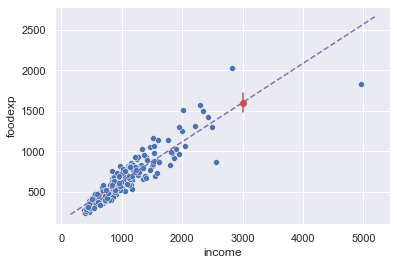

In [17]:
# plot the data points using a scatter plot
sns.scatterplot(x='income', y='foodexp', data=df)

axes = plt.gca()   # get axes instance of current figure
x_vals = np.array(axes.get_xlim())   # get x-axis limits
y_vals = intercept + (slope * x_vals)   # define the equation of the regression line
plt.plot(x_vals, y_vals, '--', color='m')   # draw the regression line on top of the scatter plot

# plot the new observed x-value and the relative prediction
plt.plot(3000, pred[0], 'ro')
plt.plot((3000, 3000), (ci_lo, ci_hi), 'r') # plotting the confidence interval

plt.show()

### Advanced Exercise

1. See if you can define a [linear regression](https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares) model with the same caracteristics as the one in the "Standard Exercise" section using the `LinearRegression` [module](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression) from the `sklearn` library. Print the estimated intercept and slope coefficients of the regression model.

In [18]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(df.income.values.reshape(-1,1), df.foodexp)

In [19]:
reg.intercept_, reg.coef_

(147.47538852370565, array([0.48517842]))

2. **[very challenging]** Given the `lin_reg_coef()` function we defined from scratch in class, create a permutation test for the estimates of the slope coefficient of a regression analysis using the `penguins` dataset, where `flipper_length_mm` is the predictor and `body_mass_g` is the target variable. Would you accept or reject the null hypothesis that there is no relation between $X$ and $Y$? *(Hint: check out [this video](https://www.youtube.com/watch?v=2V1mxDATRn0) for some cues)*

In [20]:
# run this cell (do not delete it)

df = sns.load_dataset('penguins')
df = df[~pd.isna(df.flipper_length_mm)]

def lin_reg_coef(x, y): 
    
    # calculate the means of the X and Y variables
    X_mean = np.mean(x)
    Y_mean = np.mean(y)
    
    # calculate the deviations from the mean of each data point (for X and Y)
    X_mean_dev = [el-X_mean for el in x]
    Y_mean_dev = [el-Y_mean for el in y]
    
    # calculate the covariance between X and Y and the variance of X
    XY_covar = np.sum(np.array(X_mean_dev) * np.array(Y_mean_dev))
    X_var = np.sum(np.array(X_mean_dev)**2)
    
    # calculate the slope (b_1) and intercept (b_0) coefficients
    b_1 = XY_covar/X_var
    b_0 = Y_mean - b_1*X_mean
    
    return b_0, b_1        

In [21]:
# run this cell (do not delete it)

intercept, slope = lin_reg_coef(x=df['flipper_length_mm'], y=df['body_mass_g'])
intercept, slope

(-5780.831358077065, 49.685566406100094)

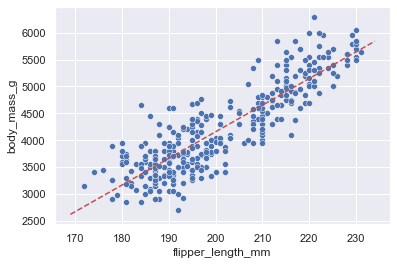

In [22]:
# run this cell (do not delete it)

sns.scatterplot(x='flipper_length_mm', y='body_mass_g', data=df)

axes = plt.gca()
x_vals = np.array(axes.get_xlim())
y_vals = intercept + slope * x_vals
plt.plot(x_vals, y_vals, '--', color='r')

plt.show()

In [23]:
n = 500
mu_intercepts = []
mu_slopes = []
for i in range(n): 
    # extract a subsample of 50% of data without replacement
    x_swapped = np.random.permutation(df['flipper_length_mm'].values)
    # use set() to get indexes of rows that were not extracted from df in previous step
    #ix2 = set(df.index) - set(df_sample1.index)
    # create dataframe with other 50% of data
    #df_sample2 = df.loc[list(ix2)]
    # calculate difference in mean from each sample
    sim_intercept, sim_slope = lin_reg_coef(x=x_swapped, y=df['body_mass_g'])
    # append sampled mean difference to mu_diff_samples list
    mu_intercepts.append(sim_intercept)
    mu_slopes.append(sim_slope)

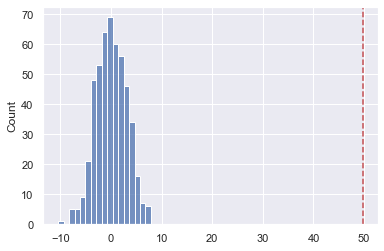

Avgerage Simulated Test Statistic: 0.0311
Initially Observed Test Statistic: 49.6856


In [24]:
sns.histplot(mu_slopes)
plt.axvline(slope, 0, 1, color='r', linestyle='--')
plt.show()
print('Avgerage Simulated Test Statistic:', f'{np.mean(mu_slopes):.4f}')
print('Initially Observed Test Statistic:', f'{slope:.4f}')

We obviously reject the null hypothesis that there is no relationship between the two variables. 